In [53]:
!pip install scikit-learn==1.1.2

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
dataset.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
dataset.shape

(456548, 9)

In [6]:
dataset.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [7]:
fulfilment=pd.read_csv('fulfilment_center_info.csv')

In [8]:
fulfilment.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
fulfilment.shape

(77, 5)

In [10]:
fulfilment.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [11]:
meal=pd.read_csv('meal_info.csv')

In [12]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [13]:
meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [14]:
#merging the above 3 datasets
final_dataset=dataset.merge(fulfilment,on='center_id',how='left').merge(meal,on='meal_id',how='left')

In [15]:
final_dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5,Desert,Indian
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5,Desert,Indian
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5,Salad,Italian
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5,Salad,Italian


In [16]:
final_dataset.shape

(456548, 15)

In [17]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [18]:
print(sorted(final_dataset['center_id'].unique()))
print(sorted(final_dataset['meal_id'].unique()))
print(sorted(final_dataset['city_code'].unique()))
print(sorted(final_dataset['region_code'].unique()))
print(final_dataset['center_type'].unique())
print(final_dataset['category'].unique())
print(final_dataset['cuisine'].unique())

[10, 11, 13, 14, 17, 20, 23, 24, 26, 27, 29, 30, 32, 34, 36, 39, 41, 42, 43, 50, 51, 52, 53, 55, 57, 58, 59, 61, 64, 65, 66, 67, 68, 72, 73, 74, 75, 76, 77, 80, 81, 83, 86, 88, 89, 91, 92, 93, 94, 97, 99, 101, 102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137, 139, 143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186]
[1062, 1109, 1198, 1207, 1216, 1230, 1247, 1248, 1311, 1438, 1445, 1525, 1543, 1558, 1571, 1727, 1754, 1770, 1778, 1803, 1847, 1878, 1885, 1902, 1962, 1971, 1993, 2104, 2126, 2139, 2290, 2304, 2306, 2322, 2444, 2490, 2492, 2494, 2539, 2569, 2577, 2581, 2631, 2640, 2664, 2704, 2707, 2760, 2826, 2867, 2956]
[456, 461, 473, 478, 485, 515, 517, 522, 526, 541, 553, 556, 561, 562, 576, 577, 579, 590, 593, 596, 599, 602, 604, 609, 614, 615, 620, 628, 632, 638, 647, 648, 649, 651, 654, 658, 659, 675, 676, 679, 680, 683, 685, 693, 695, 698, 699, 700, 702, 703, 713]
[23, 34, 35, 56, 71, 77, 85, 93]
['TYPE_C' 'TYPE_B' 'TYPE_A']
['Beverages' 'Rice Bowl' 'Starters' 'Pas

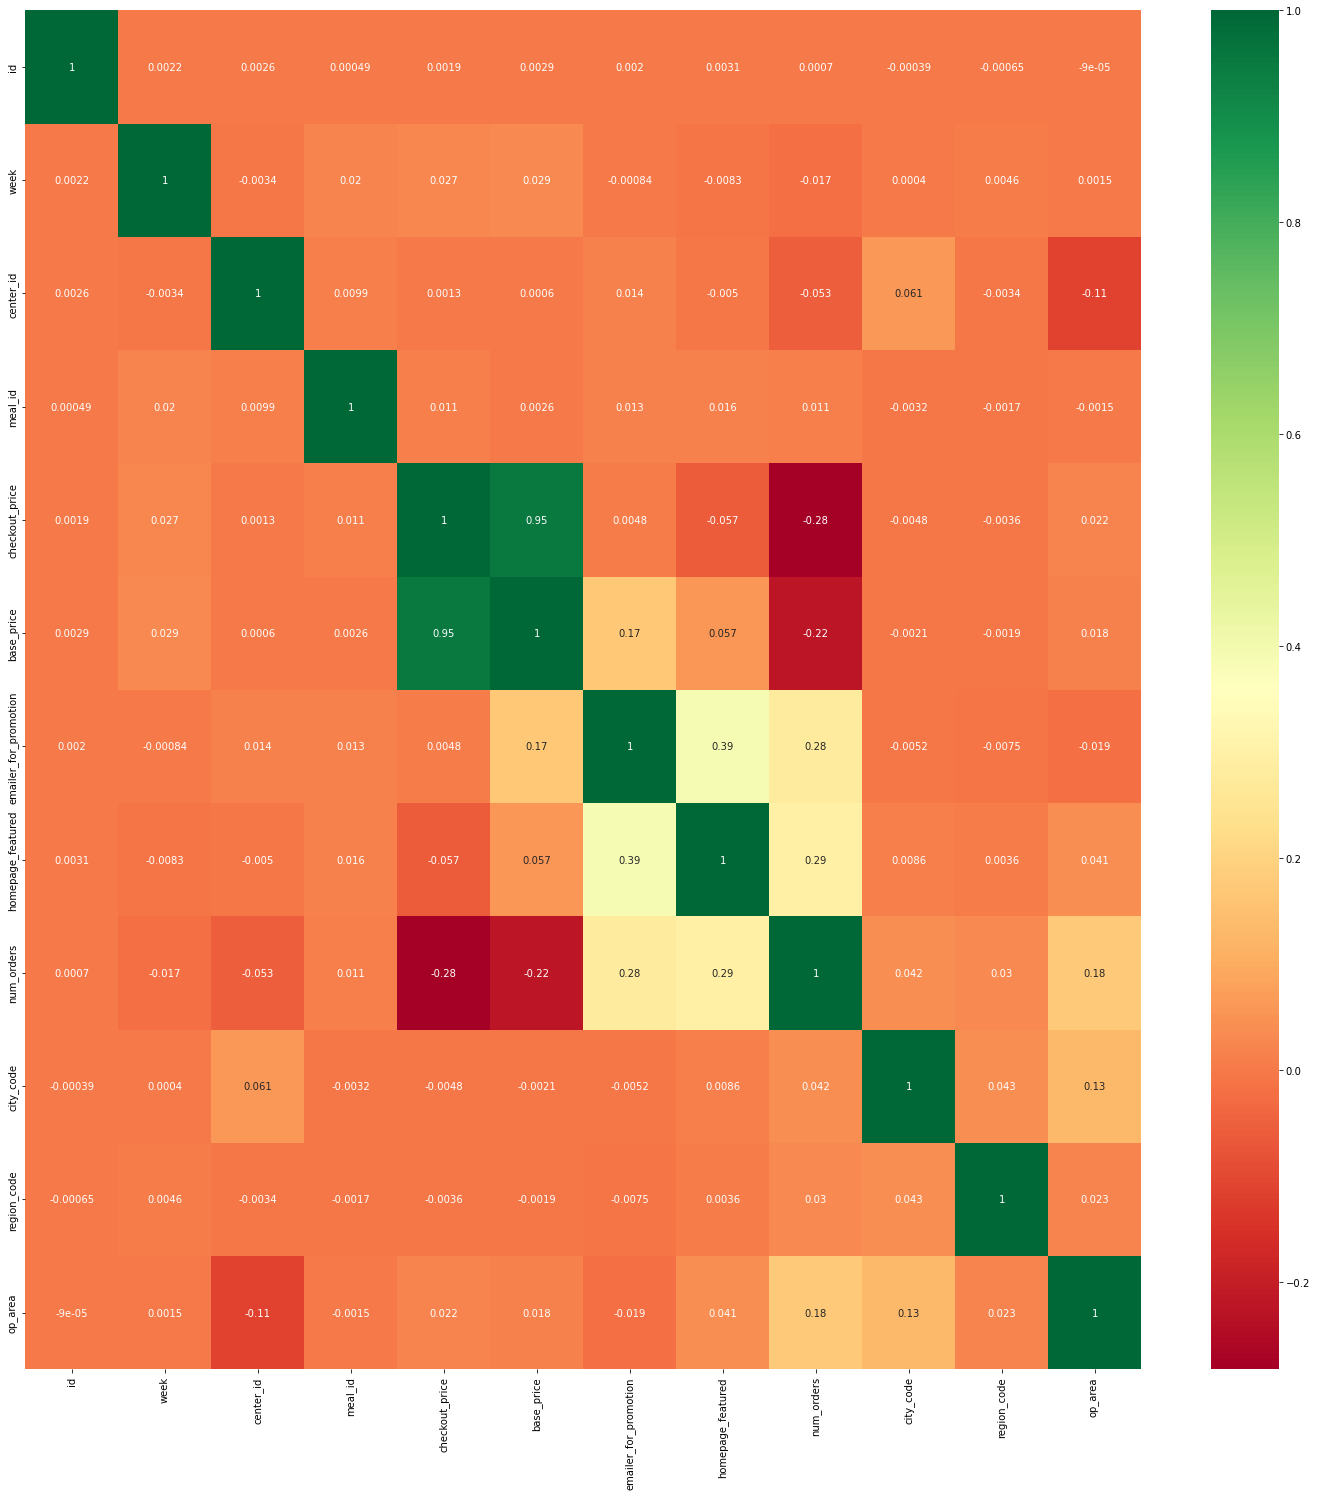

In [19]:
corr_mat=final_dataset.corr()
top_corr_fea=corr_mat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(final_dataset[top_corr_fea].corr(),annot=True,cmap="RdYlGn")

In [20]:
corr_mat['num_orders'].sort_values(ascending=False)

num_orders               1.000000
homepage_featured        0.294490
emailer_for_promotion    0.277147
op_area                  0.176976
city_code                0.041596
region_code              0.029744
meal_id                  0.010597
id                       0.000702
week                    -0.017210
center_id               -0.053035
base_price              -0.222306
checkout_price          -0.282108
Name: num_orders, dtype: float64

In [21]:
final_dataset.drop(['id','center_id','meal_id'],inplace=True,axis=1)

In [22]:
final_dataset.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [23]:
#label encoding for center_type,category and cuisine
from sklearn.preprocessing import  LabelEncoder

In [24]:
le= LabelEncoder()
final_dataset["center_type_trans"]=le.fit_transform(final_dataset["center_type"])
final_dataset["category_trans"]=le.fit_transform(final_dataset["category"])
final_dataset["cuisine_trans"]=le.fit_transform(final_dataset["cuisine"])

In [25]:
final_dataset.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,center_type_trans,category_trans,cuisine_trans
0,1,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
1,1,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
2,1,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai,2,0,3
3,1,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian,2,0,1
4,1,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian,2,0,1


In [26]:
#checking the corresponding numerical values for center_type,category and cuisine
print(final_dataset['center_type'].unique())
print(final_dataset['category'].unique())
print(final_dataset['cuisine'].unique())
print(final_dataset['center_type_trans'].unique())
print(final_dataset['category_trans'].unique())
print(final_dataset['cuisine_trans'].unique())

['TYPE_C' 'TYPE_B' 'TYPE_A']
['Beverages' 'Rice Bowl' 'Starters' 'Pasta' 'Sandwich' 'Biryani' 'Extras'
 'Pizza' 'Seafood' 'Other Snacks' 'Desert' 'Soup' 'Salad' 'Fish']
['Thai' 'Indian' 'Italian' 'Continental']
[2 1 0]
[ 0  8 13  6 10  1  3  7 11  5  2 12  9  4]
[3 1 2 0]


In [27]:
final_dataset.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'city_code', 'region_code',
       'center_type', 'op_area', 'category', 'cuisine', 'center_type_trans',
       'category_trans', 'cuisine_trans'],
      dtype='object')

In [28]:
final_dataset.drop(['center_type','category','cuisine'],inplace=True,axis=1)

In [29]:
#rearranging columns
updated_dataset=final_dataset[['category_trans','cuisine_trans','week','checkout_price','base_price','emailer_for_promotion','homepage_featured','city_code','region_code','op_area','center_type_trans','num_orders']]

In [30]:
updated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   category_trans         456548 non-null  int32  
 1   cuisine_trans          456548 non-null  int32  
 2   week                   456548 non-null  int64  
 3   checkout_price         456548 non-null  float64
 4   base_price             456548 non-null  float64
 5   emailer_for_promotion  456548 non-null  int64  
 6   homepage_featured      456548 non-null  int64  
 7   city_code              456548 non-null  int64  
 8   region_code            456548 non-null  int64  
 9   op_area                456548 non-null  float64
 10  center_type_trans      456548 non-null  int32  
 11  num_orders             456548 non-null  int64  
dtypes: float64(3), int32(3), int64(6)
memory usage: 40.1 MB


array([[<AxesSubplot:xlabel='num_orders', ylabel='num_orders'>,
        <AxesSubplot:xlabel='homepage_featured', ylabel='num_orders'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>,
        <AxesSubplot:xlabel='base_price', ylabel='num_orders'>,
        <AxesSubplot:xlabel='emailer_for_promotion', ylabel='num_orders'>],
       [<AxesSubplot:xlabel='num_orders', ylabel='homepage_featured'>,
        <AxesSubplot:xlabel='homepage_featured', ylabel='homepage_featured'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='homepage_featured'>,
        <AxesSubplot:xlabel='base_price', ylabel='homepage_featured'>,
        <AxesSubplot:xlabel='emailer_for_promotion', ylabel='homepage_featured'>],
       [<AxesSubplot:xlabel='num_orders', ylabel='checkout_price'>,
        <AxesSubplot:xlabel='homepage_featured', ylabel='checkout_price'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='checkout_price'>,
        <AxesSubplot:xlabel='base_price', ylabel='checkout_price

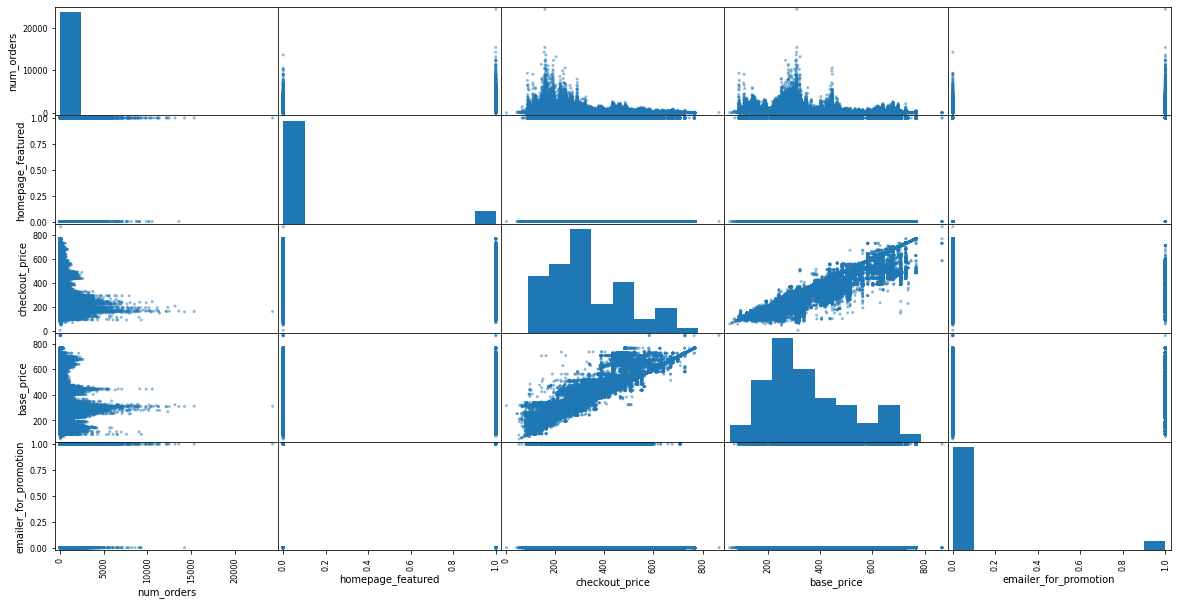

In [32]:
from pandas.plotting import scatter_matrix
strong_att=["num_orders",'homepage_featured',"checkout_price","base_price","emailer_for_promotion"]
scatter_matrix(updated_dataset[strong_att],figsize=(20,10))

In [31]:
from sklearn.model_selection import train_test_split
X=updated_dataset.iloc[:,0:-1]
Y=updated_dataset.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 11)
model.fit(X_train, Y_train)
model_pred=model.predict(X_test)
model_predt=model.predict(X_train)
model_rmse_score = np.sqrt(mean_squared_error(Y_test, model_pred))
model_rmse_scoret= np.sqrt(mean_squared_error(Y_train,model_predt))
model_rsquared_score = r2_score(Y_test, model_pred)
model_mae=mean_absolute_error(Y_test,model_pred)
print("MODEL GRADIENT BOOST REGRESSION")
print('RMSE score for test:', model_rmse_score)
print('RMSE score for train:', model_rmse_scoret)
print('R2 score:', model_rsquared_score)
print('MAE score:', model_mae)
print('Variance score test:', model.score(X_test, Y_test))
print('Variance score train:', model.score(X_train, Y_train))


MODEL GRADIENT BOOST REGRESSION
RMSE score for test: 160.3930195021782
RMSE score for train: 106.2878874845307
R2 score: 0.8332784430588183
MAE score: 80.369454327045
Variance score test: 0.8332784430588183
Variance score train: 0.9284105365172142


In [36]:
#crossvalidation on model
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
model_r2_scores= model_selection.cross_val_score(model, X_test, Y_test, scoring="r2", cv=model_selection.KFold(n_splits=10, random_state=5,shuffle=True))
print("R2 SCORES MEAN",model_r2_scores.mean())

R2 SCORES MEAN 0.784059475113712


In [37]:
import pickle
file=open('gradientboostmodel.pkl','wb')
pickle.dump(model,file)

In [48]:
Y_pred=model.predict(X_test)
Y_pred.shape

(136965,)

(136965,)

In [40]:
np.array(Y_pred)

array([  75.03439166,  216.8412507 ,  221.57009213, ..., 1128.84250369,
        229.01163251,  298.48697442])

In [41]:
np.array(Y_test)

array([ 28, 176, 391, ..., 972, 242, 352], dtype=int64)

In [43]:
model.score(X_train,Y_train)

0.9284105365172142

In [44]:
model.score(X_test,Y_test)

0.8332784430588183

In [51]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

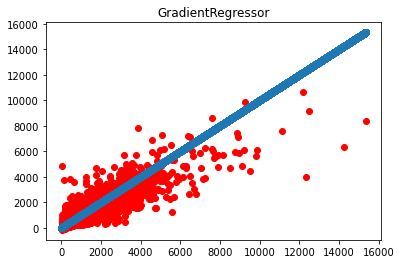

In [52]:
plotGraph(Y_test,Y_pred,"GradientRegressor")